## Train a model locally and log training metrics with Experiment

We train a model on the local computer and use Experiment to log and retrieve metric and data.

In [1]:
from azureml.core import Workspace

ws = Workspace.from_config()
print(f"Using Azure ML {ws.name}")

Using Azure ML azml-sdk


### Train model and log metrics and files

We can use Jupyter notebook to train a model interactively as we normally do, and use Experiment to log the training metrics. 

In [2]:
from azureml.core import Experiment

experiment = Experiment(workspace=ws, name="diabetes-model-train")
run = experiment.start_logging()

In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/diabetes.csv")

In [4]:
from sklearn.model_selection import train_test_split

random_seed = 1830

X, y = df[['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']], df['Diabetic']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=random_seed)

run.log("train_test_split_random_state", random_seed)

In [5]:
from sklearn.linear_model import LogisticRegression

reg = 0.01
run.log("regularization_rate", reg)

model_lr = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

In [6]:
from sklearn.metrics import roc_auc_score, plot_roc_curve

y_valid_pred = model_lr.predict_proba(X_valid)
auc = roc_auc_score(y_valid, y_valid_pred[:, 1])

run.log("auc", auc)

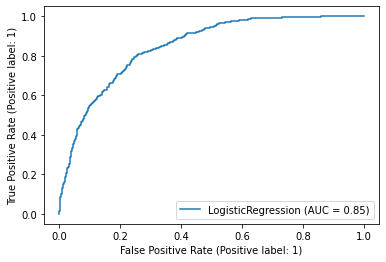

In [7]:
import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(6, 6))
fig = plot_roc_curve(model_lr, X_valid, y_valid)
run.log_image(name="ROC Curve", plot=fig.figure_)

In [8]:
import joblib

model_file_name = "diabetes_lr_model.pkl"

with open(model_file_name, "wb") as file:
    joblib.dump(model_lr, file)
    
run.upload_file(model_file_name, model_file_name)

In [9]:
run.complete()

In [10]:
run.get_portal_url()

'https://ml.azure.com/runs/9609b4e9-7440-4c7c-a22a-d896a7876745?wsid=/subscriptions/e6195ec1-51fe-4f2b-ba59-809f64544642/resourcegroups/azml-tutorials/workspaces/azml-sdk&tid=37e91b6c-3707-4f6c-96d4-48a1d2e55375'

<details>

<summary>Title text here</summary>

Collapsed text here.

</details>